# **Early stopping**

Early stopping là một kỹ thuật trong quá trình huấn luyện mô hình máy học (đặc biệt là trong việc huấn luyện mạng nơ-ron) để ngừng việc huấn luyện trước khi mô hình bắt đầu overfitting dữ liệu huấn luyện. Ý tưởng chính là theo dõi hiệu suất của mô hình trên tập dữ liệu kiểm thử (hoặc validation set) trong suốt quá trình huấn luyện. Khi hiệu suất trên tập kiểm thử không còn cải thiện hoặc bắt đầu giảm, quá trình huấn luyện sẽ dừng.

Cơ chế hoạt động của early stopping như sau:

1. **Đánh giá hiệu suất:** Trong mỗi epoch (lặp), mô hình được đánh giá trên tập dữ liệu kiểm thử, và kết quả hiệu suất được theo dõi. Thông thường, đánh giá hiệu suất này được thực hiện sau một số lượng epoch cố định.

2. **So sánh với tốt nhất:** Khi hiệu suất trên tập kiểm thử bắt đầu giảm, mô hình hiện tại không được cải thiện nữa. Early stopping so sánh hiệu suất hiện tại với hiệu suất tốt nhất đã được đạt được trong quá trình huấn luyện.

3. **Ngừng huấn luyện:** Nếu không có cải thiện đáng kể trong một số lượng epoch liên tiếp, huấn luyện sẽ dừng. Mô hình được chọn là mô hình có hiệu suất tốt nhất trên tập kiểm thử.

Ưu điểm của early stopping bao gồm:

- **Ngăn chặn overfitting:** Ngừng huấn luyện trước khi mô hình bắt đầu overfitting có thể giúp duy trì tính tổng quát của mô hình.
- **Tiết kiệm thời gian:** Giảm thiểu việc huấn luyện không cần thiết, giúp tiết kiệm thời gian và tăng hiệu suất.

Tuy nhiên, early stopping cũng có thể dẫn đến việc dừng quá sớm nếu có nhiễu ngẫu nhiên trong hiệu suất đánh giá, và có thể không phải lúc nào cũng là phương pháp tốt nhất tùy thuộc vào bộ dữ liệu cụ thể và mô hình được sử dụng.

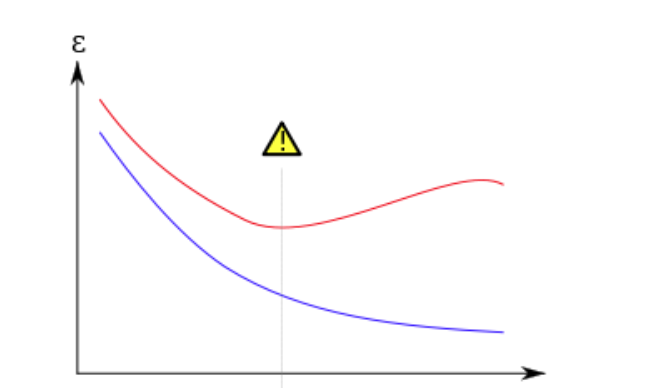

# **Code**

**import thư viện**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

**Tạo dữ liệu**

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [ ]:
X

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

In [ ]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

<Axes: >

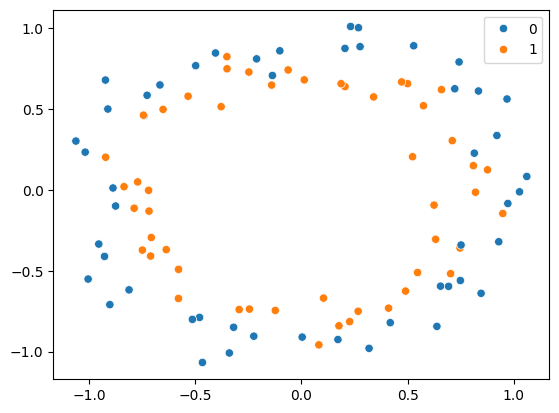

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

**Phân chia dữ liệu và lấy 20% dữ liệu cho tập test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

**Trường hợp gây overfitting khi không sử dụng early stopping**

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
# Dense(256, input_dim=2, activation='relu')
# tạo ra một lớp dày đặc (fully connected) với 256 nút (neurons).
# input_dim=2 chỉ định rằng dữ liệu đầu vào cho mô hình này có 2 đặc trưng. Điều này phù hợp với dữ liệu 2 chiều (ví dụ: các cặp tọa độ).
# activation='relu' chỉ định rằng hàm kích hoạt của các nút trong lớp này là hàm ReLU (Rectified Linear Unit). Hàm ReLU là một hàm kích hoạt phi tuyến phổ biến, giúp mô hình học các mối quan hệ phức tạp trong dữ liệu.
model.add(Dense(1, activation='sigmoid'))
# Dense(1, activation='sigmoid')
# thêm một lớp dày đặc với một nút duy nhất.
# activation='sigmoid' sử dụng hàm kích hoạt Sigmoid. Hàm này thường được sử dụng cho các bài toán phân loại nhị phân, vì nó đưa ra kết quả trong khoảng từ 0 đến 1, có thể được hiểu là xác suất của một lớp cụ thể.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Loss Function - Hàm Mất Mát (loss):

# loss='binary_crossentropy' chỉ định hàm mất mát là cross-entropy nhị phân. Đây là lựa chọn phổ biến cho các bài toán phân loại nhị phân, nơi mục tiêu là dự đoán một trong hai lớp (ví dụ: Có hoặc Không, 1 hoặc 0).
# Hàm mất mát này đo lường mức độ sai lệch giữa dự đoán của mô hình và giá trị thực tế, và mục tiêu của quá trình học là giảm thiểu giá trị này.
# Optimizer - Bộ Tối Ưu Hóa (optimizer):

# optimizer='adam' chỉ định bộ tối ưu hóa sẽ được sử dụng là Adam. Adam (Adaptive Moment Estimation) là một bộ tối ưu hóa hiệu quả và phổ biến, được biết đến với việc tính toán tỷ lệ học tập thích ứng cho mỗi tham số của mô hình.
# Bộ tối ưu hóa này giúp điều chỉnh trọng số của mạng trong quá trình học, dựa trên gradient của hàm mất mát.
# Metrics - Số liệu Đánh Giá (metrics):

# metrics=['accuracy'] yêu cầu mô hình theo dõi độ chính xác (accuracy) trong quá trình học. Độ chính xác là một số liệu đánh giá phổ biến, đo lường tỷ lệ phần trăm các mẫu được phân loại chính xác.
# Việc theo dõi số liệu này không ảnh hưởng đến quá trình học của mô hình, nhưng cung cấp thông tin hữu ích để đánh giá hiệu suất của mô hình.

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=1)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
3/3 [==============================] - 0s 25ms/step - loss: 0.2073 - accuracy: 0.9125 - val_loss: 0.6586 - val_accuracy: 0.6500
Epoch 1002/3500
3/3 [==============================] - 0s 25ms/step - loss: 0.2087 - accuracy: 0.9125 - val_loss: 0.6575 - val_accuracy: 0.6500
Epoch 1003/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.2072 - accuracy: 0.9125 - val_loss: 0.6575 - val_accuracy: 0.6500
Epoch 1004/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.2077 - accuracy: 0.9125 - val_loss: 0.6616 - val_accuracy: 0.6500
Epoch 1005/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.2082 - accuracy: 0.9125 - val_loss: 0.6660 - val_accuracy: 0.6500
Epoch 1006/3500
3/3 [==============================] - 0s 31ms/step - loss: 0.2081 - accuracy: 0.9250 - val_loss: 0.6659 - val_accuracy: 0.6500
Epoch 1007/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.2075 - accuracy: 

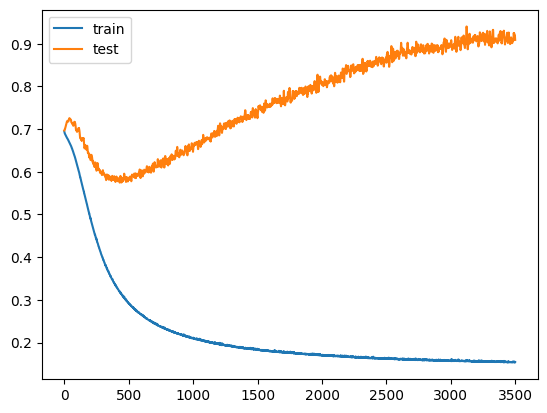

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**Khi đã sử dụng Early Stopping để tránh overfitting**

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=100,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 155ms/step - loss: 0.6921 - accuracy: 0.5625 - val_loss: 0.7051 - val_accuracy: 0.3000
Epoch 2/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6905 - accuracy: 0.5500 - val_loss: 0.7069 - val_accuracy: 0.3000
Epoch 3/3500
3/3 [==============================] - 0s 33ms/step - loss: 0.6893 - accuracy: 0.5250 - val_loss: 0.7072 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 34ms/step - loss: 0.6879 - accuracy: 0.5250 - val_loss: 0.7065 - val_accuracy: 0.4500
Epoch 5/3500
3/3 [==============================] - 0s 34ms/step - loss: 0.6870 - accuracy: 0.5375 - val_loss: 0.7066 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 38ms/step - loss: 0.6865 - accuracy: 0.5375 - val_loss: 0.7065 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 36ms/step - loss: 0.6856 - accuracy: 0.5500 - val_loss: 0.7068 - val_accuracy: 0.4000
Epoch 8/3500

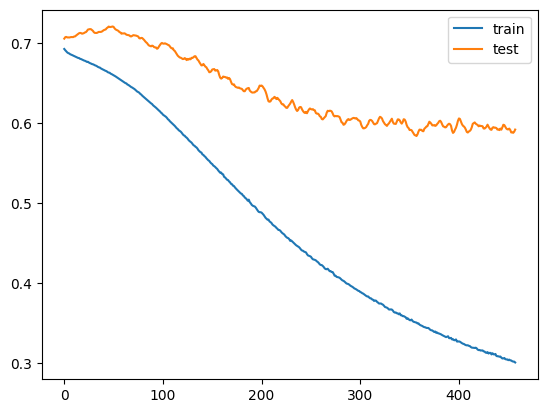

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()